In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets = pd.read_csv('train.csv')
tweets.head()
tweets.target.describe()

count               7,613.00
mean                    0.43
std                     0.50
min                     0.00
25%                     0.00
50%                     0.00
75%                     1.00
max                     1.00
Name: target, dtype: float64

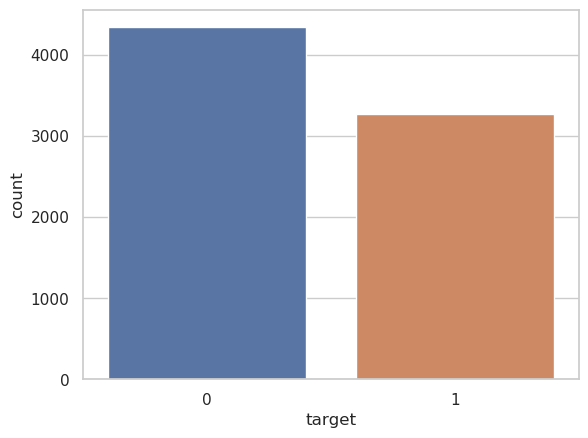

In [3]:
sns.countplot('target', data = tweets)

## Analisis de largo de tweet y cantidad de palabras de tweet


In [4]:
tweets['lentghText'] = tweets['text'].str.len()
tweets['#words']=tweets['text'].str.split().map(lambda x: len(x))
tweets.head()

,id,keyword,location,text,target,lentghText,#words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


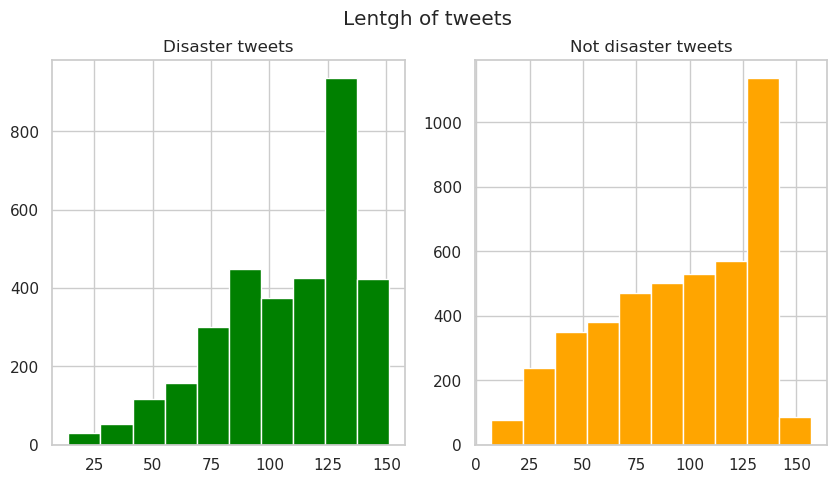

In [5]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.hist(tweets[tweets['target']==1]['lentghText'],color='green')
ax1.set_title('Disaster tweets')
ax2.hist(tweets[tweets['target']==0]['lentghText'],color='orange')
ax2.set_title('Not disaster tweets')
fig.suptitle('Lentgh of tweets')
plt.show()

In [6]:
!pip install ptitprince

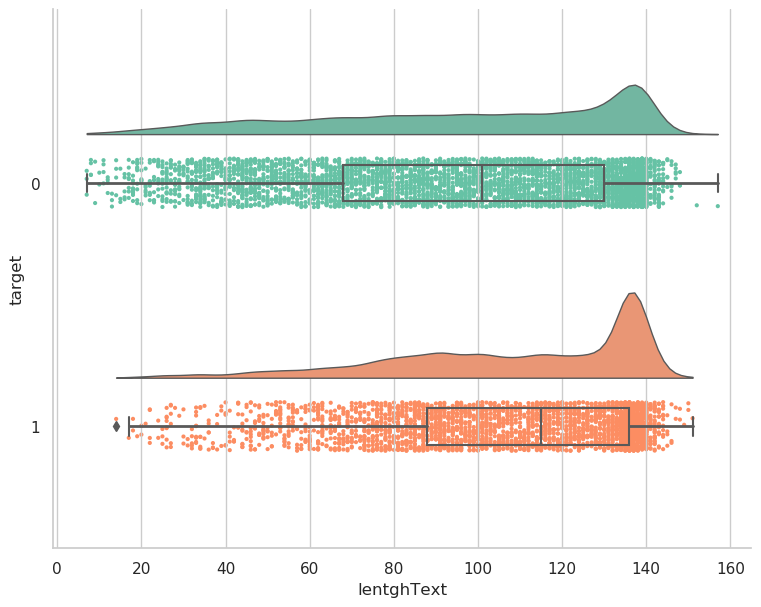

In [7]:
import ptitprince as pt
fig, ax = plt.subplots(figsize=(9,7))

ax = pt.RainCloud(data = tweets, x = "target", y = "lentghText",orient='h',bw=.1, ax=ax)
ax.set_title
sns.despine()

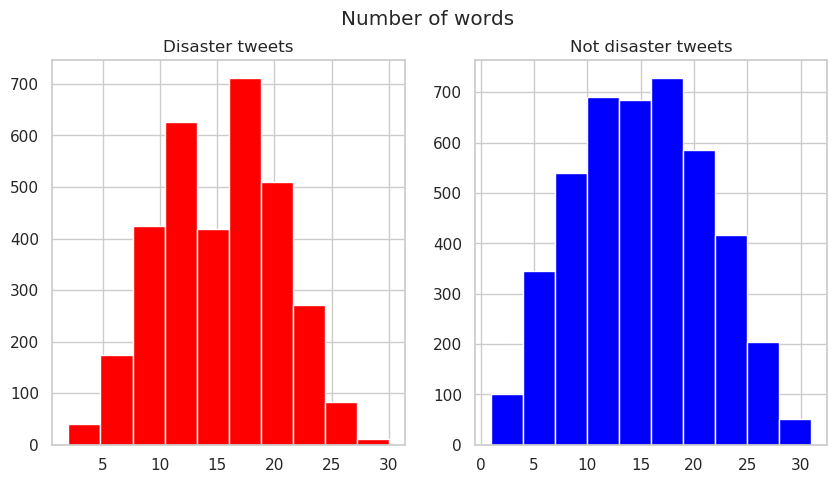

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.hist(tweets[tweets['target']==1]['#words'],color='red')
ax1.set_title('Disaster tweets')
ax2.hist(tweets[tweets['target']==0]['#words'],color='blue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Number of words')
plt.show()

#### Ahora veamos un wordcloud que muestra las palabras mas usadas

In [9]:
!pip install wordcloud

In [10]:
from wordcloud import WordCloud

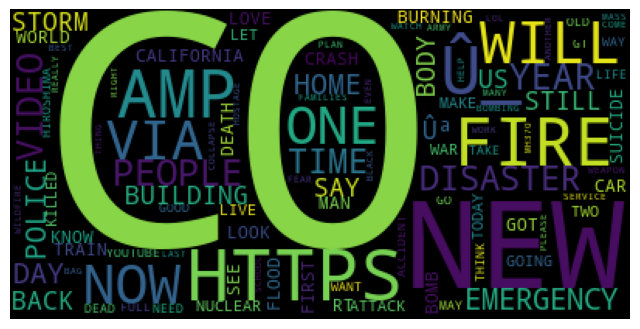

In [11]:
text1 = tweets["text"].dropna().tolist()
text = " ".join(text1).upper()
wc = WordCloud(max_words=100,max_font_size=500,min_font_size=3\
               , background_color="black"\
               ,collocations=False # Considerar solo una palabra y no frases
              ).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation="kaiser")
plt.axis("off")
plt.show()

Vemos que hay paginas web, vamos a filtrarlas y hacer de nuevo el grafico

In [12]:
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

tweets['textnoturl']=tweets['text'].apply(lambda x : remove_URL(x))

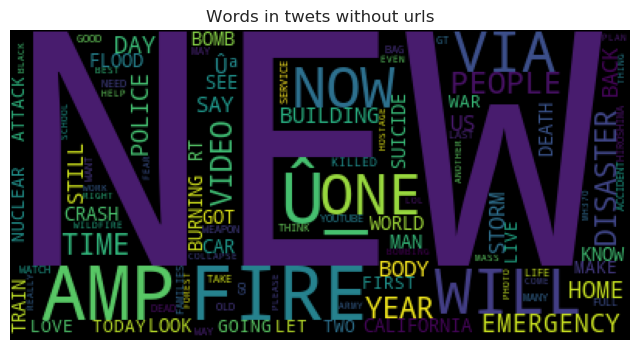

In [13]:
text1 = tweets["textnoturl"].dropna().tolist()
text = " ".join(text1).upper()
wc = WordCloud(max_words=100,max_font_size=500,min_font_size=3\
               , background_color="black"\
               ,collocations=False # Considerar solo una palabra y no frases
              ).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation="kaiser")
plt.axis("off")
plt.title("Words in twets without urls")
plt.show()

Ahora vamos a diferenciar entre un "disaster tweet" y un "not disaster tweet"

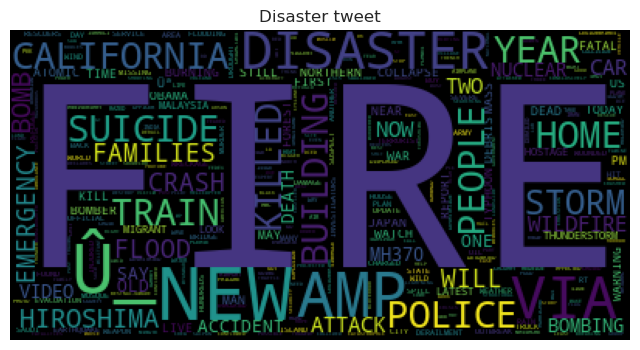

In [14]:
text1 = tweets.loc[tweets['target']==1]["textnoturl"].dropna().tolist()
text = " ".join(text1).upper()
wc = WordCloud(max_words=500,max_font_size=500,min_font_size=3\
               , background_color="black"\
               ,collocations=False # Considerar solo una palabra y no frases
              ).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation="kaiser")
plt.axis("off")
plt.title("Disaster tweet")
plt.show()

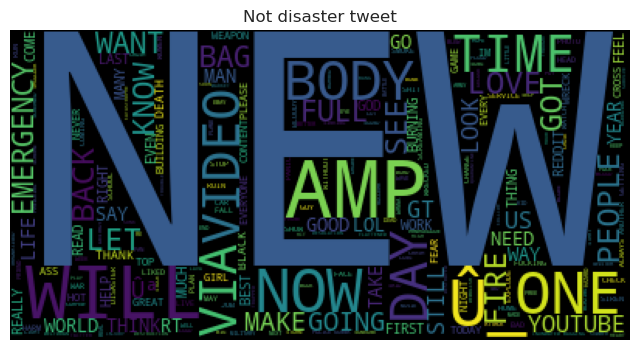

In [15]:
text1 = tweets.loc[tweets['target']==0]["textnoturl"].dropna().tolist()
text = " ".join(text1).upper()
wc = WordCloud(max_words=500,max_font_size=500,min_font_size=3\
               , background_color="black"\
               ,collocations=False # Considerar solo una palabra y no frases
              ).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation="kaiser")
plt.axis("off")
plt.title("Not disaster tweet")
plt.show()

In [16]:
def find_match2(str):
    res = ' '
    aux=str.split('#')
    aux.pop(0)
    if aux:
        for a in aux:
            if a:
                res = res+' ' + a.split()[0]
    return res

In [17]:
tweets['hashtags']=tweets['text'].apply(lambda x: find_match2(x))
tweets.head(10)

,id,keyword,location,text,target,lentghText,#words,textnoturl,hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,Our Deeds are the Reason of this #earthquake M...,earthquake
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,Forest fire near La Ronge Sask. Canada,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,All residents asked to 'shelter in place' are ...,
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,"13,000 people receive #wildfires evacuation or...",wildfires
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,Just got sent this photo from Ruby #Alaska as ...,Alaska wildfires
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,18,#RockyFire Update => California Hwy. 20 closed...,RockyFire CAfire wildfires
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,14,#flood #disaster Heavy rain causes flash flood...,flood disaster
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,15,I'm on top of the hill and I can see a fire in...,
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,12,There's an emergency evacuation happening now ...,
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,10,I'm afraid that the tornado is coming to our a...,


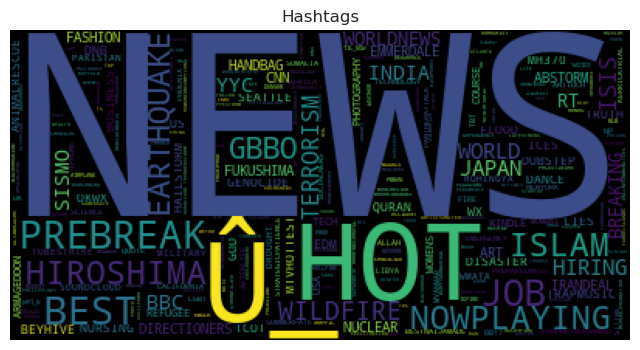

In [19]:
text1 = tweets["hashtags"].dropna().tolist()
text = " ".join(text1).upper()
wc = WordCloud(max_words=500,max_font_size=500,min_font_size=3\
               , background_color="black"\
               ,collocations=False # Considerar solo una palabra y no frases
              ).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation="kaiser")
plt.axis("off")
plt.title("Hashtags")
plt.show()

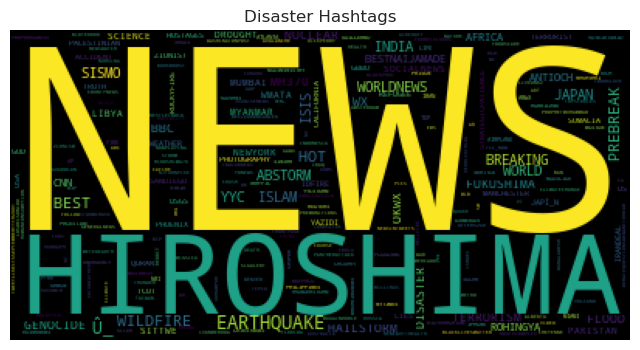

In [20]:
text1 = tweets.loc[tweets['target']==1]["hashtags"].dropna().tolist()
text = " ".join(text1).upper()
wc = WordCloud(max_words=500,max_font_size=500,min_font_size=3\
               , background_color="black"\
               ,collocations=False # Considerar solo una palabra y no frases
              ).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation="kaiser")
plt.axis("off")
plt.title("Disaster Hashtags")
plt.show()

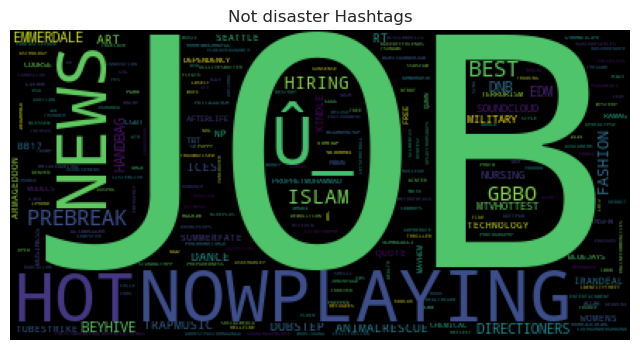

In [21]:
text1 = tweets.loc[tweets['target']==0]["hashtags"].dropna().tolist()
text = " ".join(text1).upper()
wc = WordCloud(max_words=500,max_font_size=500,min_font_size=3\
               , background_color="black"\
               ,collocations=False # Considerar solo una palabra y no frases
              ).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation="kaiser")
plt.axis("off")
plt.title("Not disaster Hashtags")
plt.show()

In [22]:
tweets['#hashtags']=tweets['hashtags'].str.split().map(lambda x: len(x))

Text(0.5, 1.0, 'Number of tweets/number of hashtags')

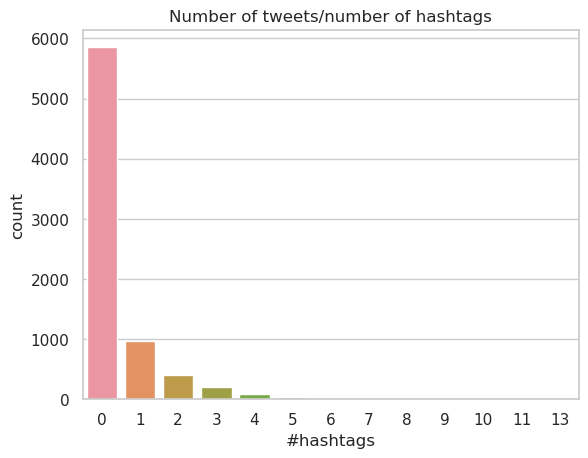

In [23]:

g1=sns.countplot('#hashtags', data = tweets)
g1.set_title("Number of tweets/number of hashtags")


In [24]:
hashtags=tweets.groupby(['#hashtags'])['target'].agg({'sum','count'}).reset_index()

[Text(0, 0.5, 'Count')]

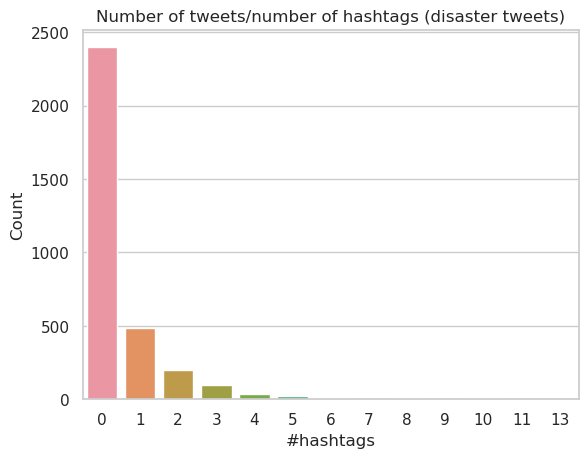

In [25]:
ax= sns.barplot(x="#hashtags", y="sum", data=hashtags)
ax.set_title("Number of tweets/number of hashtags (disaster tweets)")
ax.set(ylabel="Count")


In [26]:
tweets.loc[tweets['target']==1]["#hashtags"].value_counts()

0     2397
1      482
2      202
3      100
4       38
5       23
10       7
8        7
6        7
13       4
7        4
Name: #hashtags, dtype: int64

Text(0.5, 1.0, 'Number of tweets/number of hashtags (not disaster tweets)')

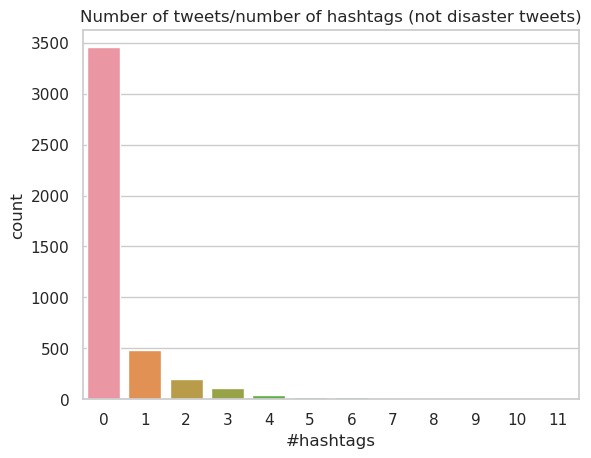

In [27]:
aux=tweets.loc[tweets['target']==0]["#hashtags"]
g1=sns.countplot(aux, data = aux)
g1.set_title("Number of tweets/number of hashtags (not disaster tweets)")

In [28]:
strofhash= " ".join(tweets['hashtags'])

In [29]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [30]:
strofhashclean= clean_text(strofhash)

Text(0.5, 1.0, 'top 20 hashtags commons')

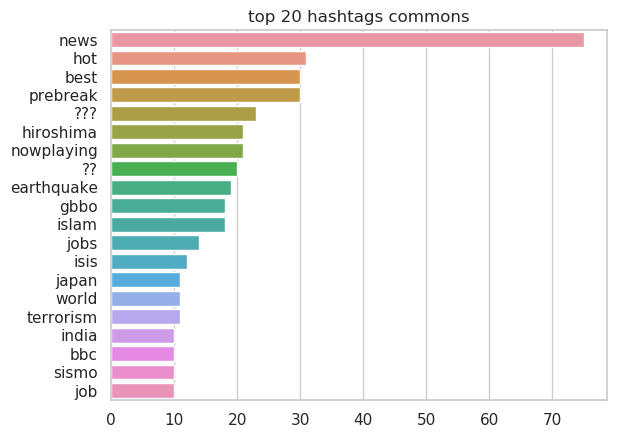

In [31]:
sns.barplot(y = pd.Series(strofhashclean.split()).value_counts()[:20].index,x = pd.Series(strofhashclean.split()).value_counts()[:20]).set_title("top 20 hashtags commons")

In [32]:
strofhash= " ".join(tweets.loc[tweets['target']==0]['hashtags'])
strofhashclean=clean_text(strofhash)

Text(0.5, 1.0, 'top 20 hashtags most used(not disaster tweets)')

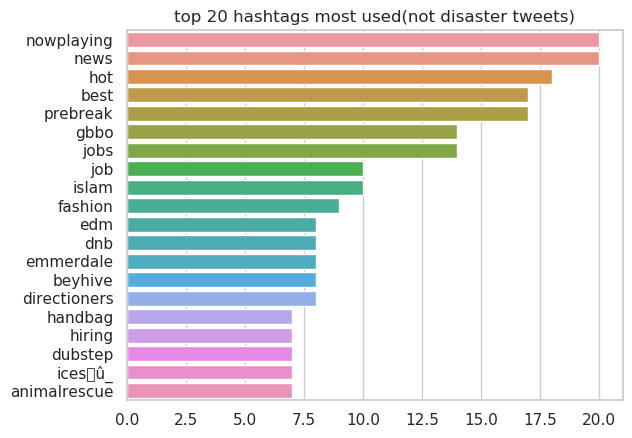

In [33]:
sns.barplot(y = pd.Series(strofhashclean.split()).value_counts()[:20].index,x = pd.Series(strofhashclean.split()).value_counts()[:20]).set_title("top 20 hashtags most used(not disaster tweets)")

In [34]:
strofhash1= " ".join(tweets.loc[tweets['target']==1]['hashtags'])
strofhash1clean=clean_text(strofhash1)

Text(0.5, 1.0, 'top 20 hashtags most used (disaster tweets)')

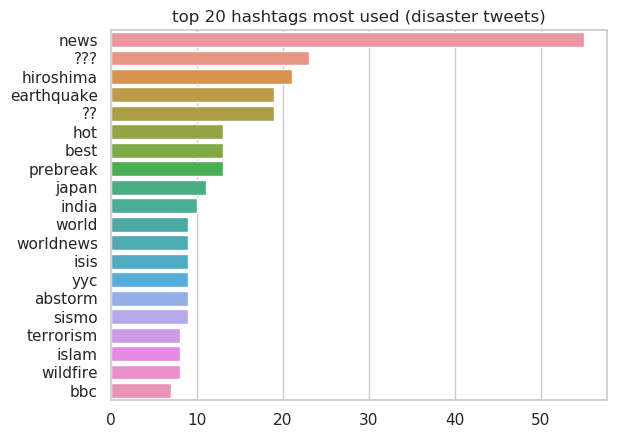

In [35]:
sns.barplot(y = pd.Series(strofhash1clean.split()).value_counts()[:20].index,x = pd.Series(strofhash1clean.split()).value_counts()[:20]).set_title("top 20 hashtags most used (disaster tweets)")